In [160]:
import pandas as pd

# load data as DataFrame
drink = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Fun Drink_price_history.csv')
drink

Day  Price
0      0   8.00
1      1   8.19
2      2   7.74
3      3   7.55
4      4   8.31
..   ...    ...
360  360   8.17
361  361   8.94
362  362   8.63
363  363   7.71
364  364   8.02

[365 rows x 2 columns]

In [161]:
# produce a 10 day ema for drinks
drink['EMA10'] = drink['Price'].ewm(span=10, adjust=False).mean()
drink['EMA5'] = drink['Price'].ewm(span=5, adjust=False).mean()
drink['EMA15'] = drink['Price'].ewm(span=15, adjust=False).mean()
drink['EMA20'] = drink['Price'].ewm(span=20, adjust=False).mean()
drink

Day  Price     EMA10      EMA5     EMA15     EMA20
0      0   8.00  8.000000  8.000000  8.000000  8.000000
1      1   8.19  8.034545  8.063333  8.023750  8.018095
2      2   7.74  7.980992  7.955556  7.988281  7.991610
3      3   7.55  7.902630  7.820370  7.933496  7.949552
4      4   8.31  7.976697  7.983580  7.980559  7.983880
..   ...    ...       ...       ...       ...       ...
360  360   8.17  7.831273  7.854513  7.851340  7.880144
361  361   8.94  8.032860  8.216342  7.987423  7.981083
362  362   8.63  8.141431  8.354228  8.067745  8.042885
363  363   7.71  8.062989  8.139485  8.023027  8.011181
364  364   8.02  8.055173  8.099657  8.022648  8.012021

[365 rows x 6 columns]

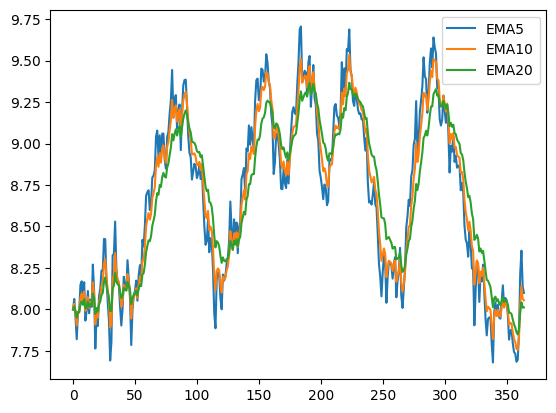

In [162]:
# plot data with EMA
import matplotlib.pyplot as plt
import numpy as np

plt.plot(drink['Day'], drink['EMA5'], label='EMA5')
plt.plot(drink['Day'], drink['EMA10'], label='EMA10')
plt.plot(drink['Day'], drink['EMA20'], label='EMA20')
plt.legend()
plt.show()


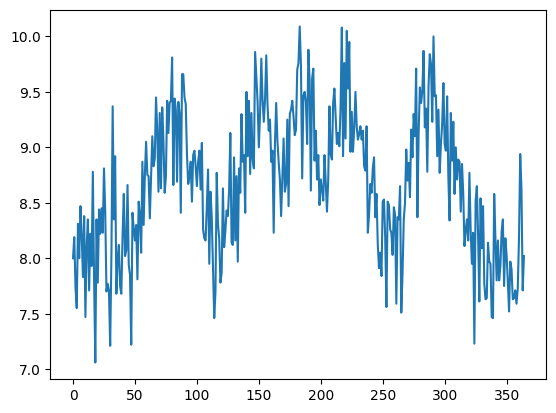

In [163]:
# plot price
plt.plot(drink['Day'], drink['Price'])

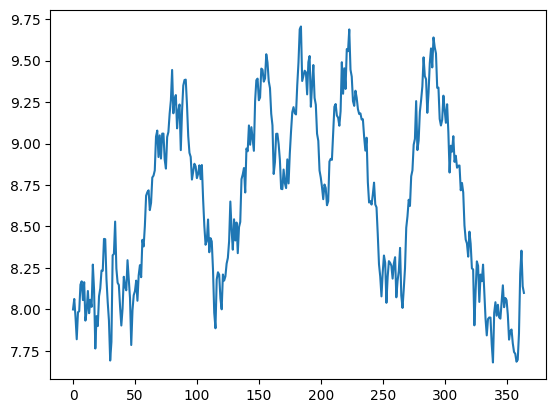

In [164]:
# plot EMA5
plt.plot(drink['Day'], drink['EMA5'])

(100.0, 200.0)

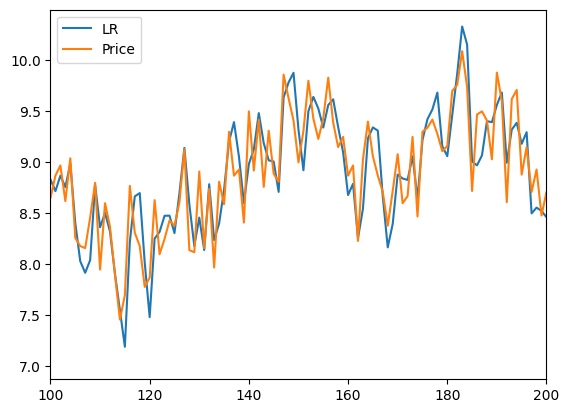

In [165]:
LR_length = 5
# create a column that is a linear regression of the last LR_length days
def linear_extrapolation(values, amt=LR_length):
    try:
        if len(values) < amt:
            return np.nan  # Not enough data to extrapolate
        x = np.arange(amt)
        y = values[-amt:]
        coeffs = np.polyfit(x, y, 1)  # Linear fit (degree 1)
        extrapolated_value = np.polyval(coeffs, amt)  # Extrapolate to the next point
        return extrapolated_value
    except TypeError:
        return np.nan

# Create the new column with extrapolated values
drink['LR'] = drink['Price'].rolling(window=LR_length).apply(linear_extrapolation, raw=True)

#plot it
plt.plot(drink['Day'], drink['LR'], label='LR')
plt.plot(drink['Day'], drink['Price'], label='Price')
plt.legend()
plt.xlim(100, 200)

In [166]:
drink

Day  Price     EMA10      EMA5     EMA15     EMA20     LR
0      0   8.00  8.000000  8.000000  8.000000  8.000000    NaN
1      1   8.19  8.034545  8.063333  8.023750  8.018095    NaN
2      2   7.74  7.980992  7.955556  7.988281  7.991610    NaN
3      3   7.55  7.902630  7.820370  7.933496  7.949552    NaN
4      4   8.31  7.976697  7.983580  7.980559  7.983880  7.952
..   ...    ...       ...       ...       ...       ...    ...
360  360   8.17  7.831273  7.854513  7.851340  7.880144  8.087
361  361   8.94  8.032860  8.216342  7.987423  7.981083  8.938
362  362   8.63  8.141431  8.354228  8.067745  8.042885  9.200
363  363   7.71  8.062989  8.139485  8.023027  8.011181  8.366
364  364   8.02  8.055173  8.099657  8.022648  8.012021  7.835

[365 rows x 7 columns]

In [167]:
# find average of last 7 days
short = drink.loc[0:8]

drink['WeekAve'] = drink['Price'].rolling(window=7).mean()
drink['WeekVar'] = drink['Price'] - drink['WeekAve']

short['WeekAve'] = short['Price'].rolling(window=7).mean()
short['WeekVar'] = short['Price'] - short['WeekAve']

drink['DayOfWeek'] = drink['Day'] % 7
short['DayOfWeek'] = short['Day'] % 7
weekly = drink.groupby('DayOfWeek').mean()
short_weekly = short.groupby('DayOfWeek').mean()
weekly

/var/folders/2l/2bz89g8j7q126ptf5h5hjrn80000gn/T/ipykernel_61210/796569094.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short['WeekAve'] = short['Price'].rolling(window=7).mean()
/var/folders/2l/2bz89g8j7q126ptf5h5hjrn80000gn/T/ipykernel_61210/796569094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short['WeekVar'] = short['Price'] - short['WeekAve']
/var/folders/2l/2bz89g8j7q126ptf5h5hjrn80000gn/T/ipykernel_61210/796569094.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Day     Price     EMA10      EMA5     EMA15     EMA20        LR  \
DayOfWeek                                                                      
0          182.0  8.667358  8.662756  8.664258  8.661771  8.661175  8.692462   
1          179.5  8.644808  8.669052  8.665013  8.670405  8.670911  8.608471   
2          180.5  8.655577  8.666602  8.661868  8.668551  8.669450  8.657725   
3          181.5  8.574808  8.649912  8.632848  8.656833  8.660437  8.611843   
4          182.5  8.807500  8.678565  8.691065  8.675667  8.674443  8.728115   
5          183.5  8.701154  8.682672  8.694428  8.678853  8.676987  8.756154   
6          184.5  8.637500  8.674459  8.675452  8.673684  8.673226  8.702365   

            WeekAve   WeekVar  
DayOfWeek                      
0          8.671648  0.008544  
1          8.680952 -0.027227  
2          8.680896 -0.007367  
3          8.682633 -0.087731  
4          8.684398  0.132857  
5          8.686162  0.028739  
6          8.671593 -0.034093

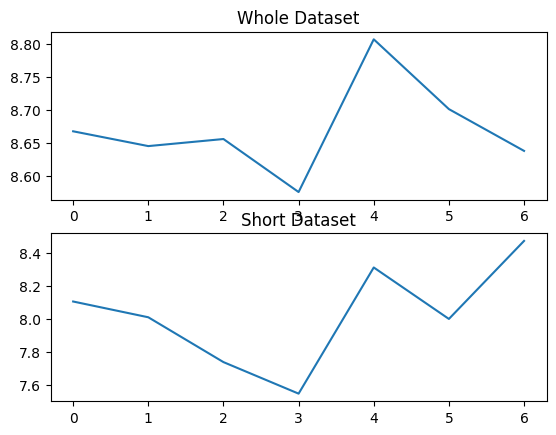

In [168]:
# plt.plot(weekly.index, weekly['Price'], label='Price')
# plt.xlabel('Day of Week')
# plt.ylabel('Price')
# plt.title('Average Price by Day of Week')

# do a subplot of weekly index and weekly price and short_weekly price
fig, ax = plt.subplots(2)
ax[0].plot(weekly.index, weekly['Price'], label='Price')
ax[0].set_title('Whole Dataset')
ax[1].plot(short_weekly.index, short_weekly['Price'], label='Short Price')
ax[1].set_title('Short Dataset')
plt.show()


Text(0.5, 1.0, 'Average Price by Day of Week')

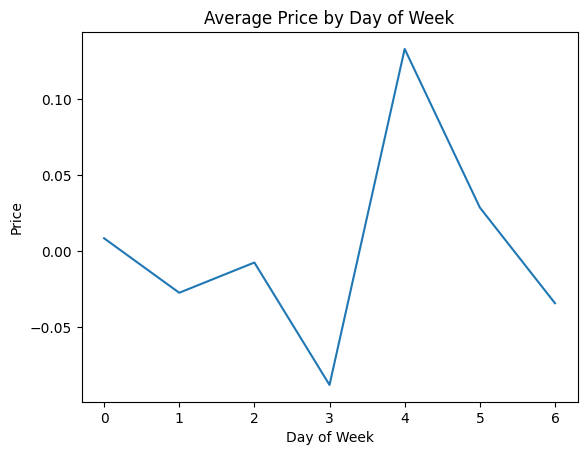

In [169]:
plt.plot(weekly.index, weekly['WeekVar'], label='Price')
plt.xlabel('Day of Week')
plt.ylabel('Price')
plt.title('Average Price by Day of Week')

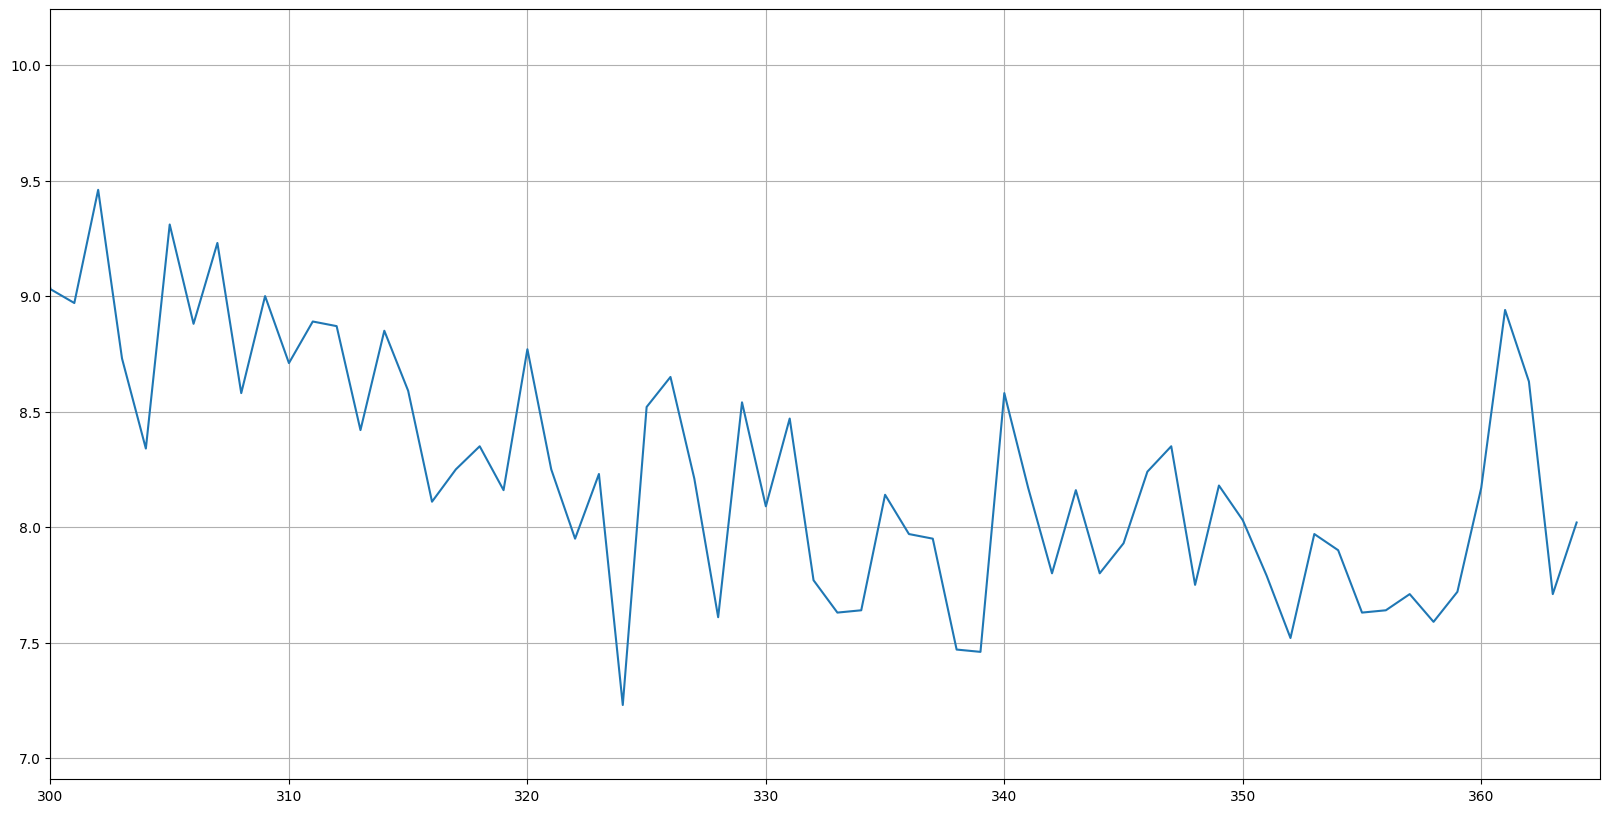

In [170]:
plt.figure(figsize=(20,10))
plt.plot(drink['Day'], drink['Price'])
plt.xlim(300, 365)
plt.grid()
# make plot bigger


The below is the profit from simply buying when day%7 = 3, and selling when day%7 = 4.

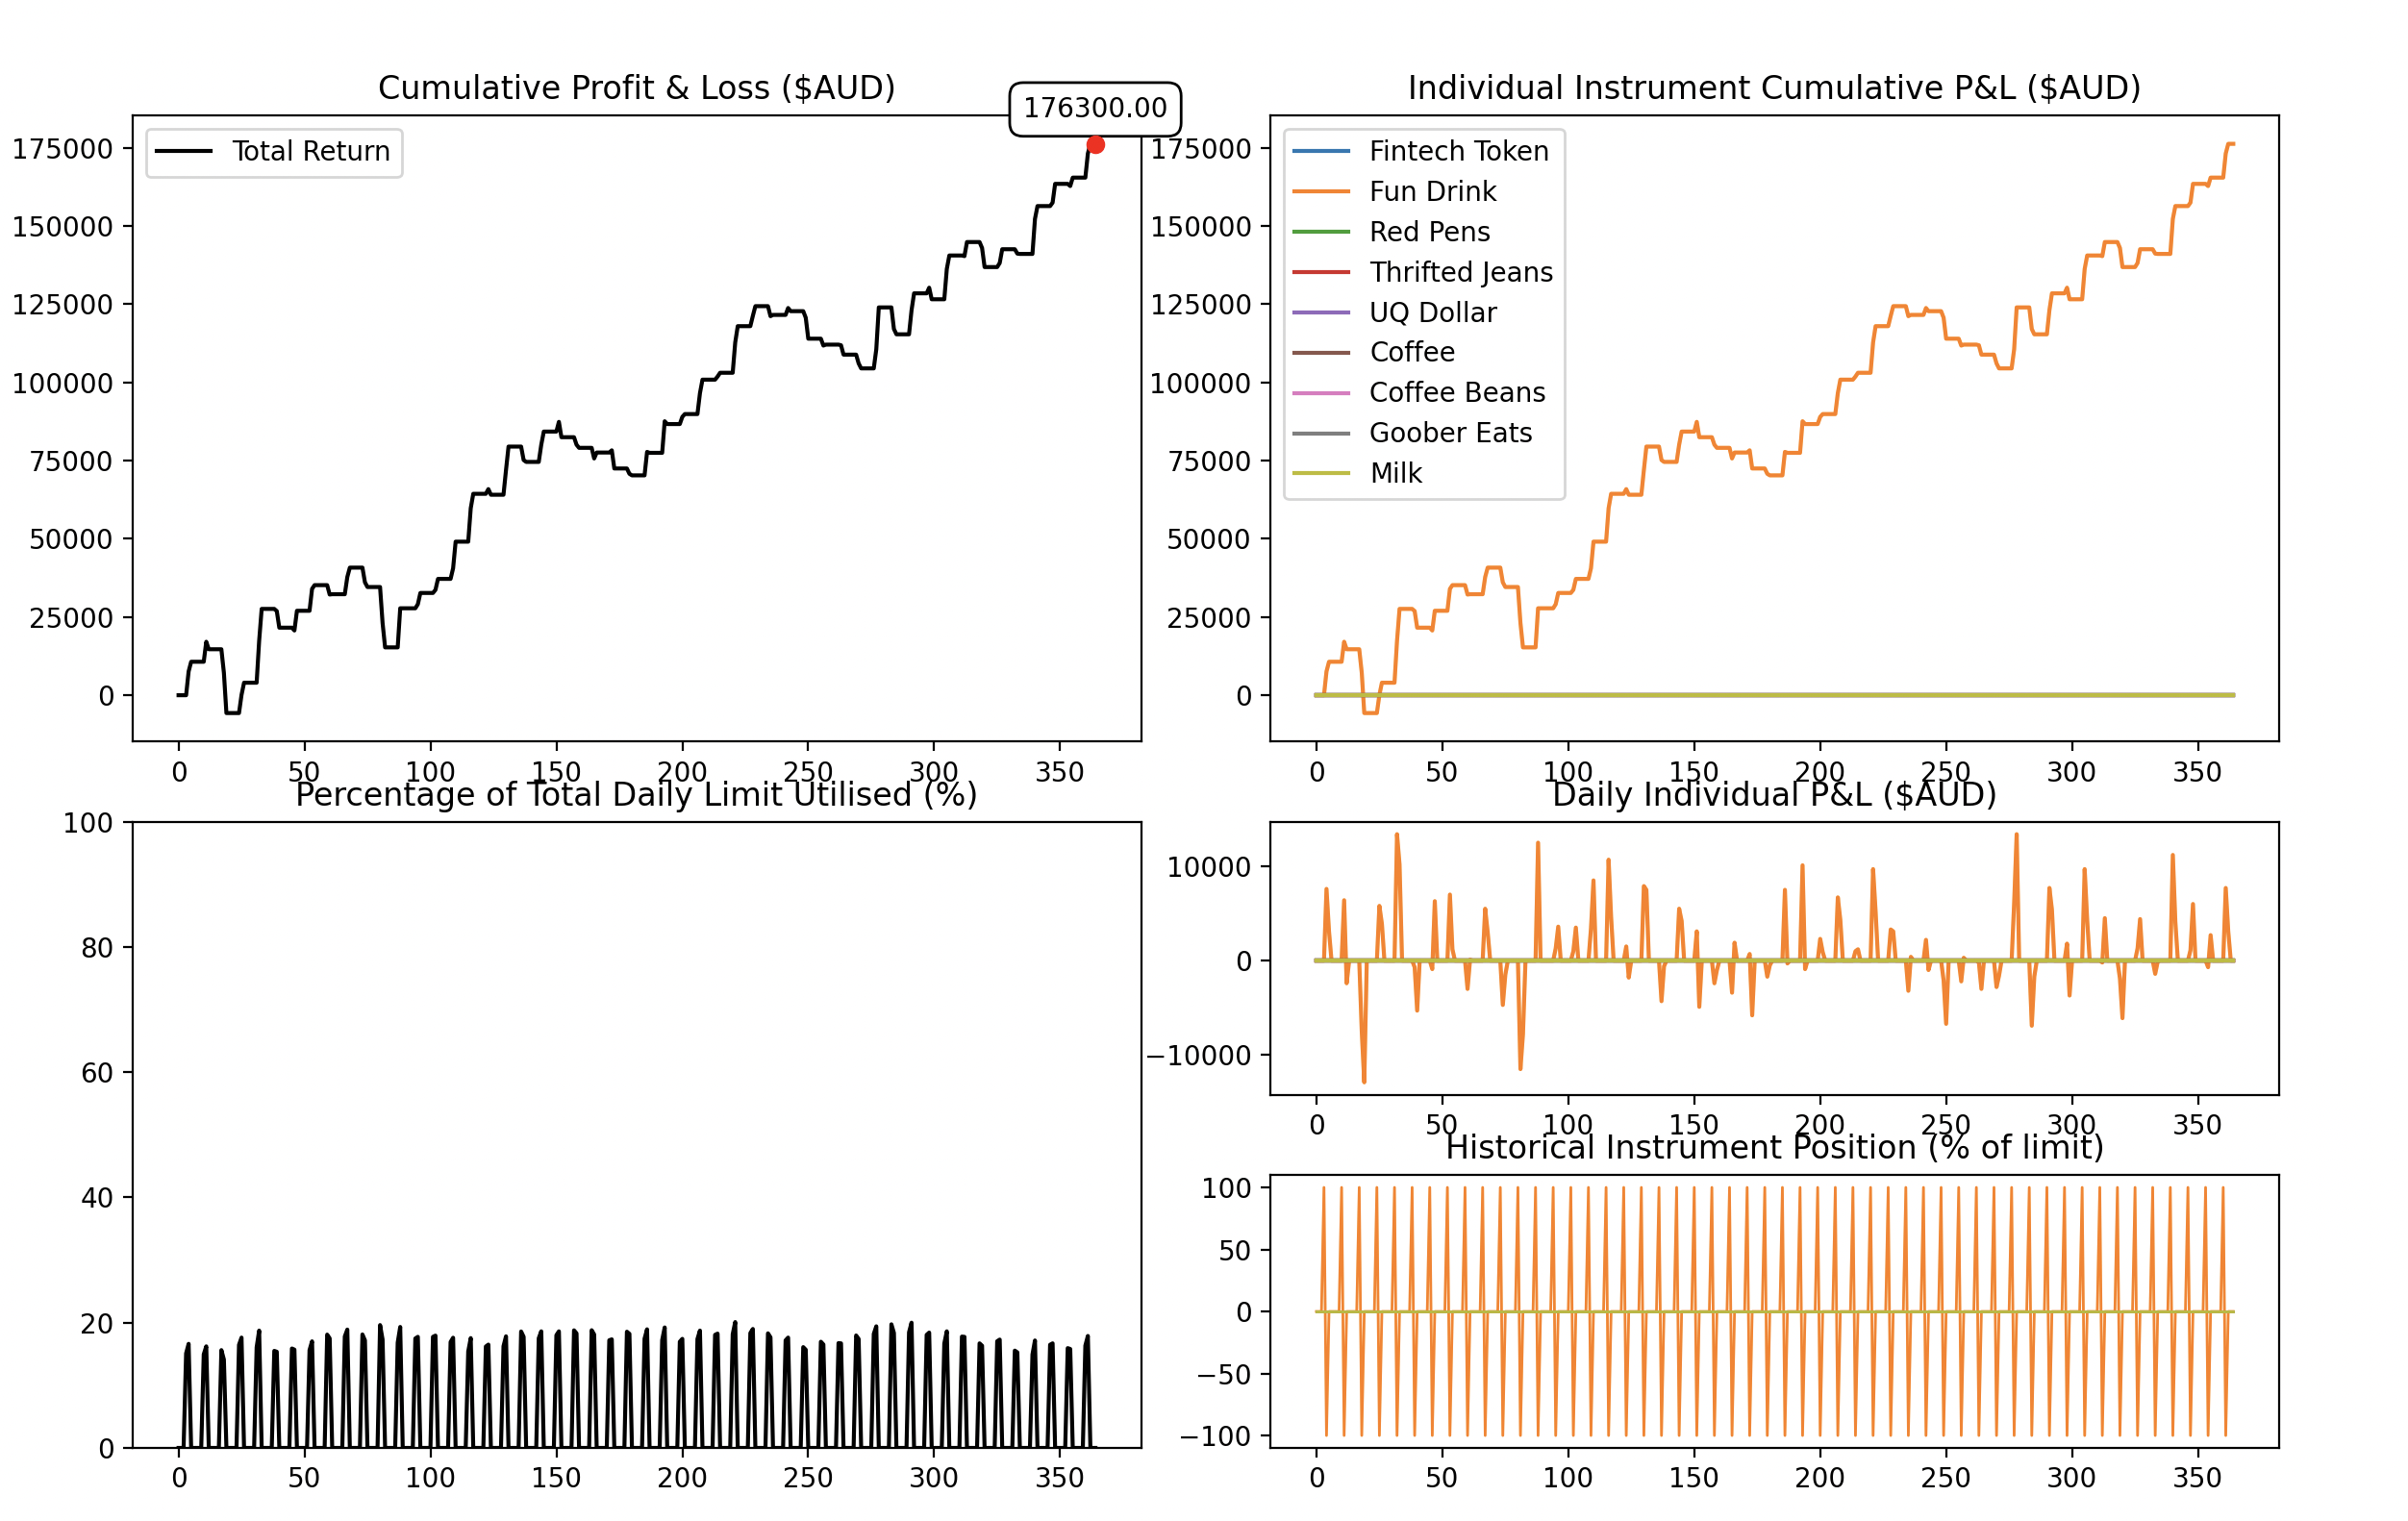

Now i am going to implement a simply EMA strategy.
For EMA 

span = 15, PNL = 812800
span = 14, PNL = 818600
span = 13, PNL = 811800
span = 12, PNL = 810000
span = 11, PNL = 808000.00
span = 10, PNL = 808000.00
span = 9, PNL = 800200
span = 8, PNL = 783600
span = 7, PNL = 783600
span = 6, PNL = 801200
span = 5, PNL = 835400
span = 4, PNL= 805800
span = 3, PNL = 808400
span = 2, PNL = 809000
span = 1, PNL = 200

The below is span = 5. The theoretical best of this strategy.
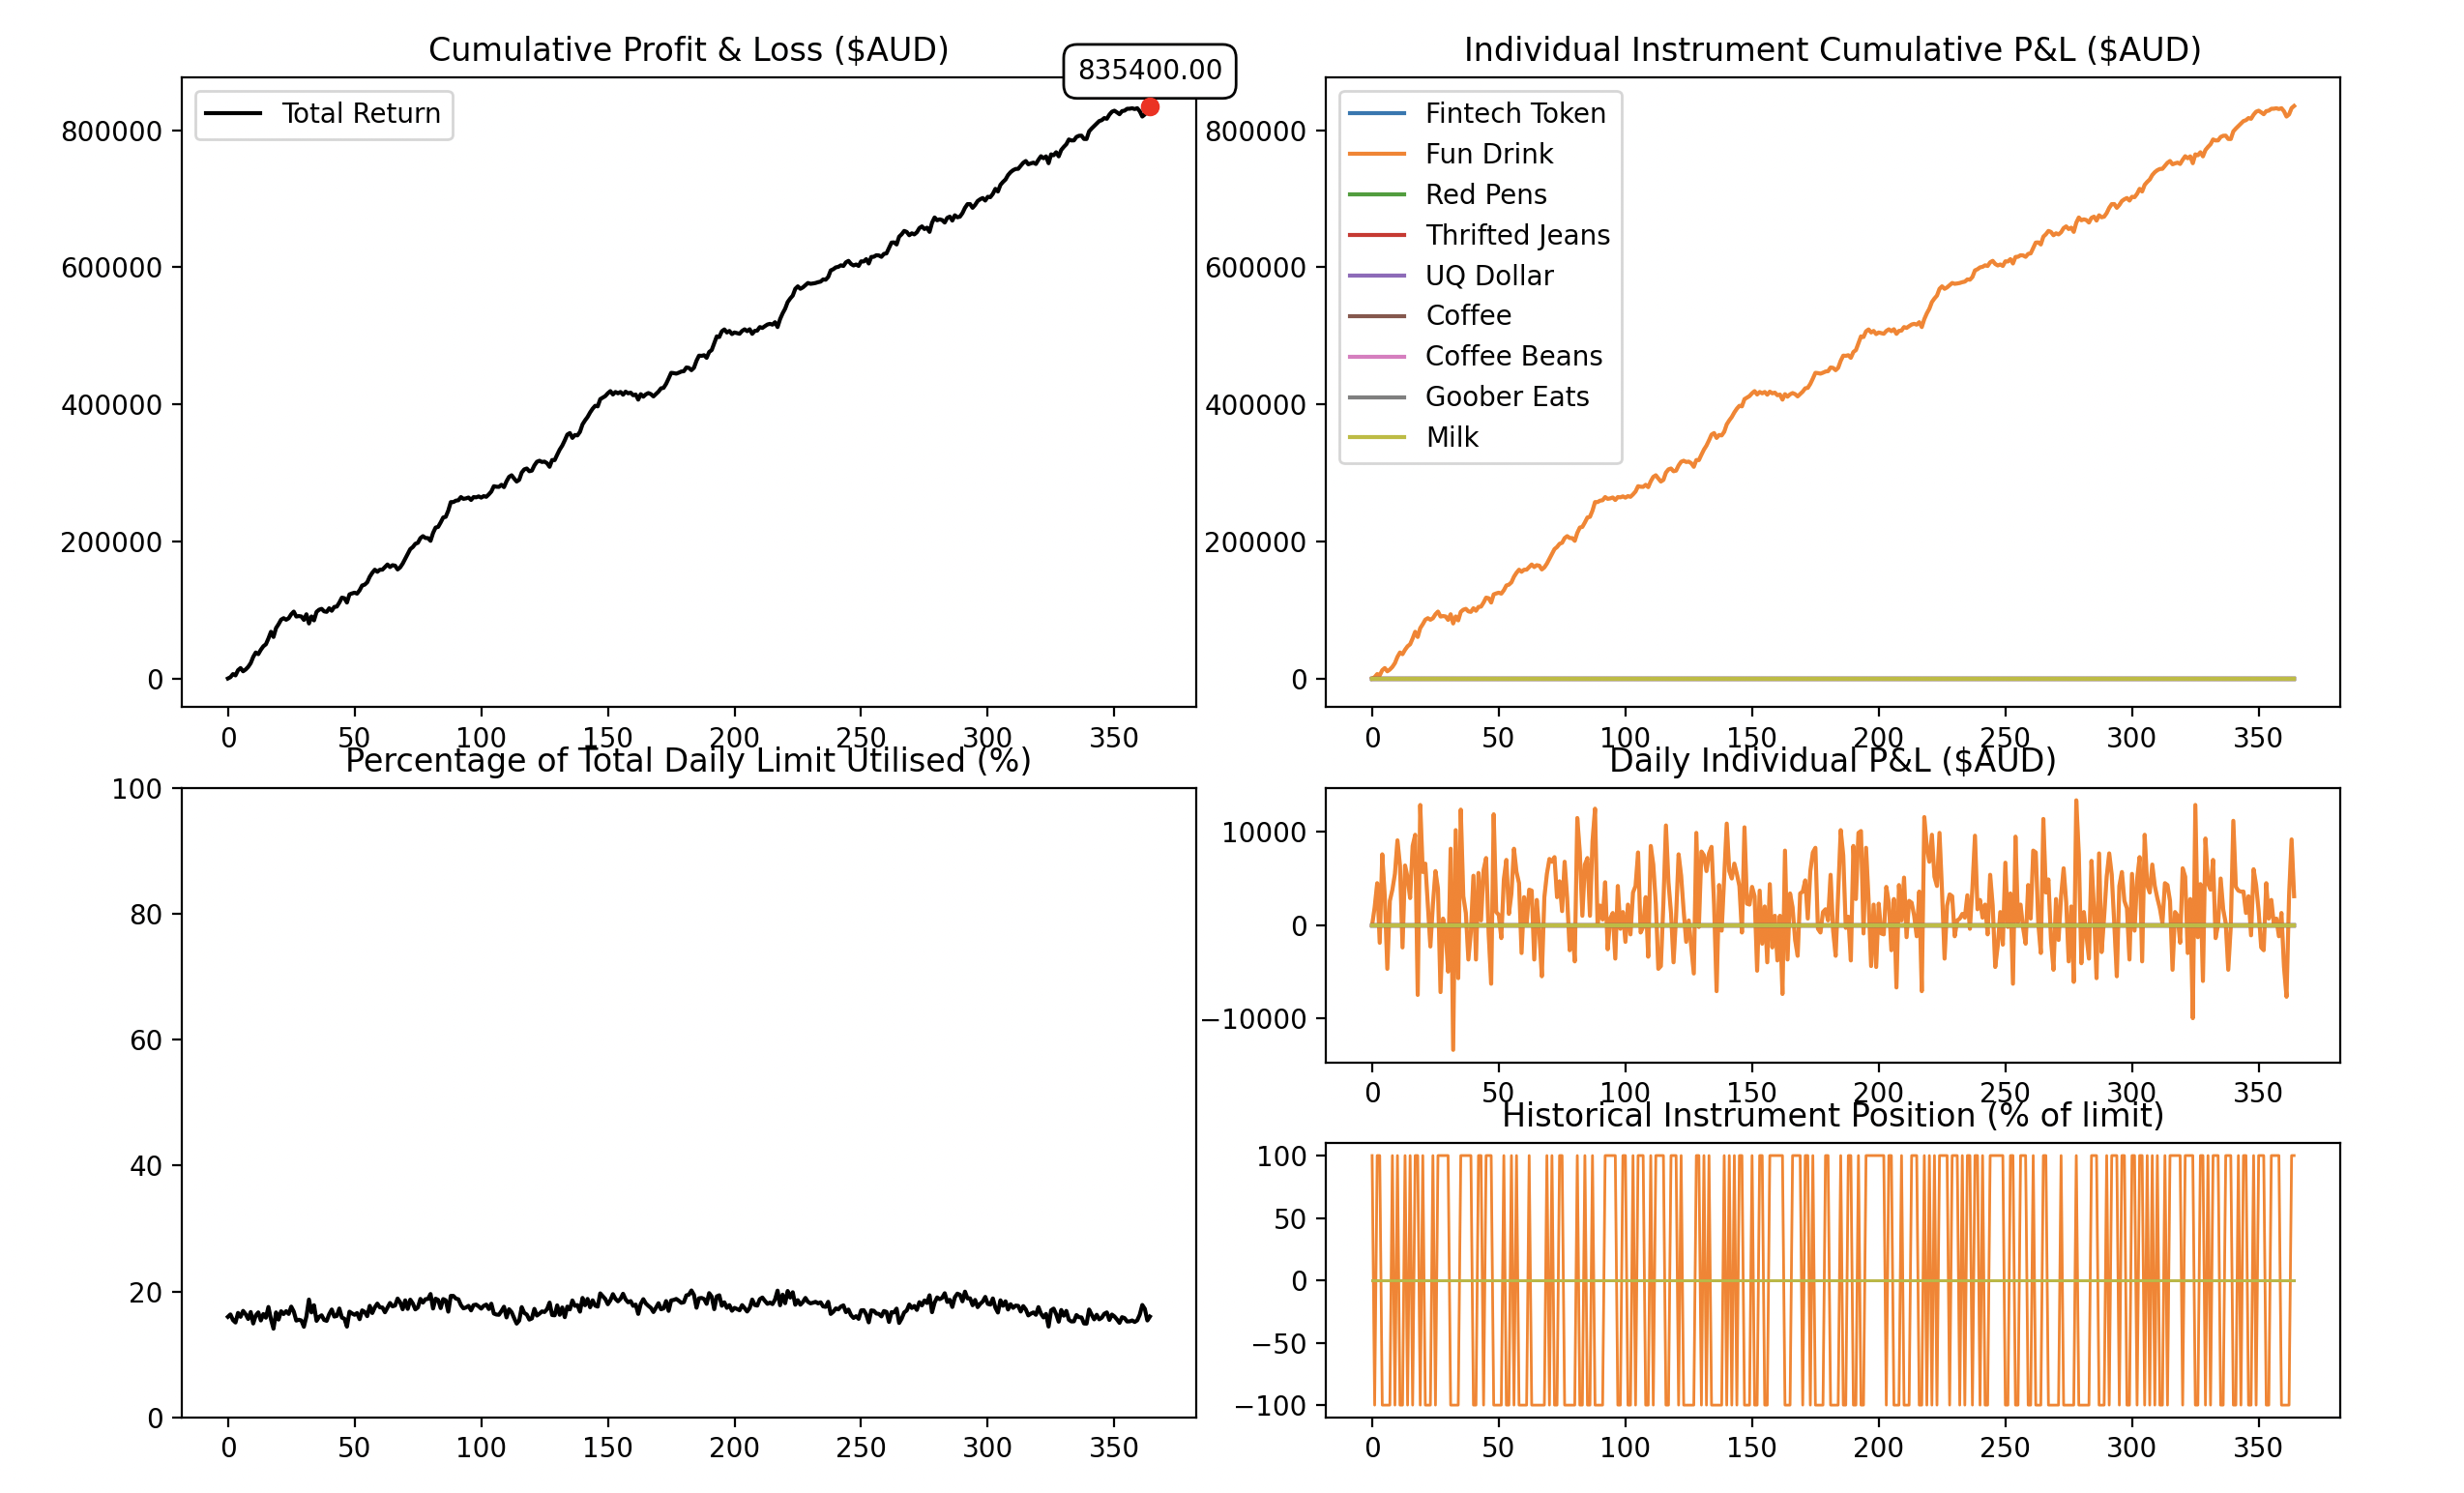

Including the buy on day 3, sell on day 4, we get:


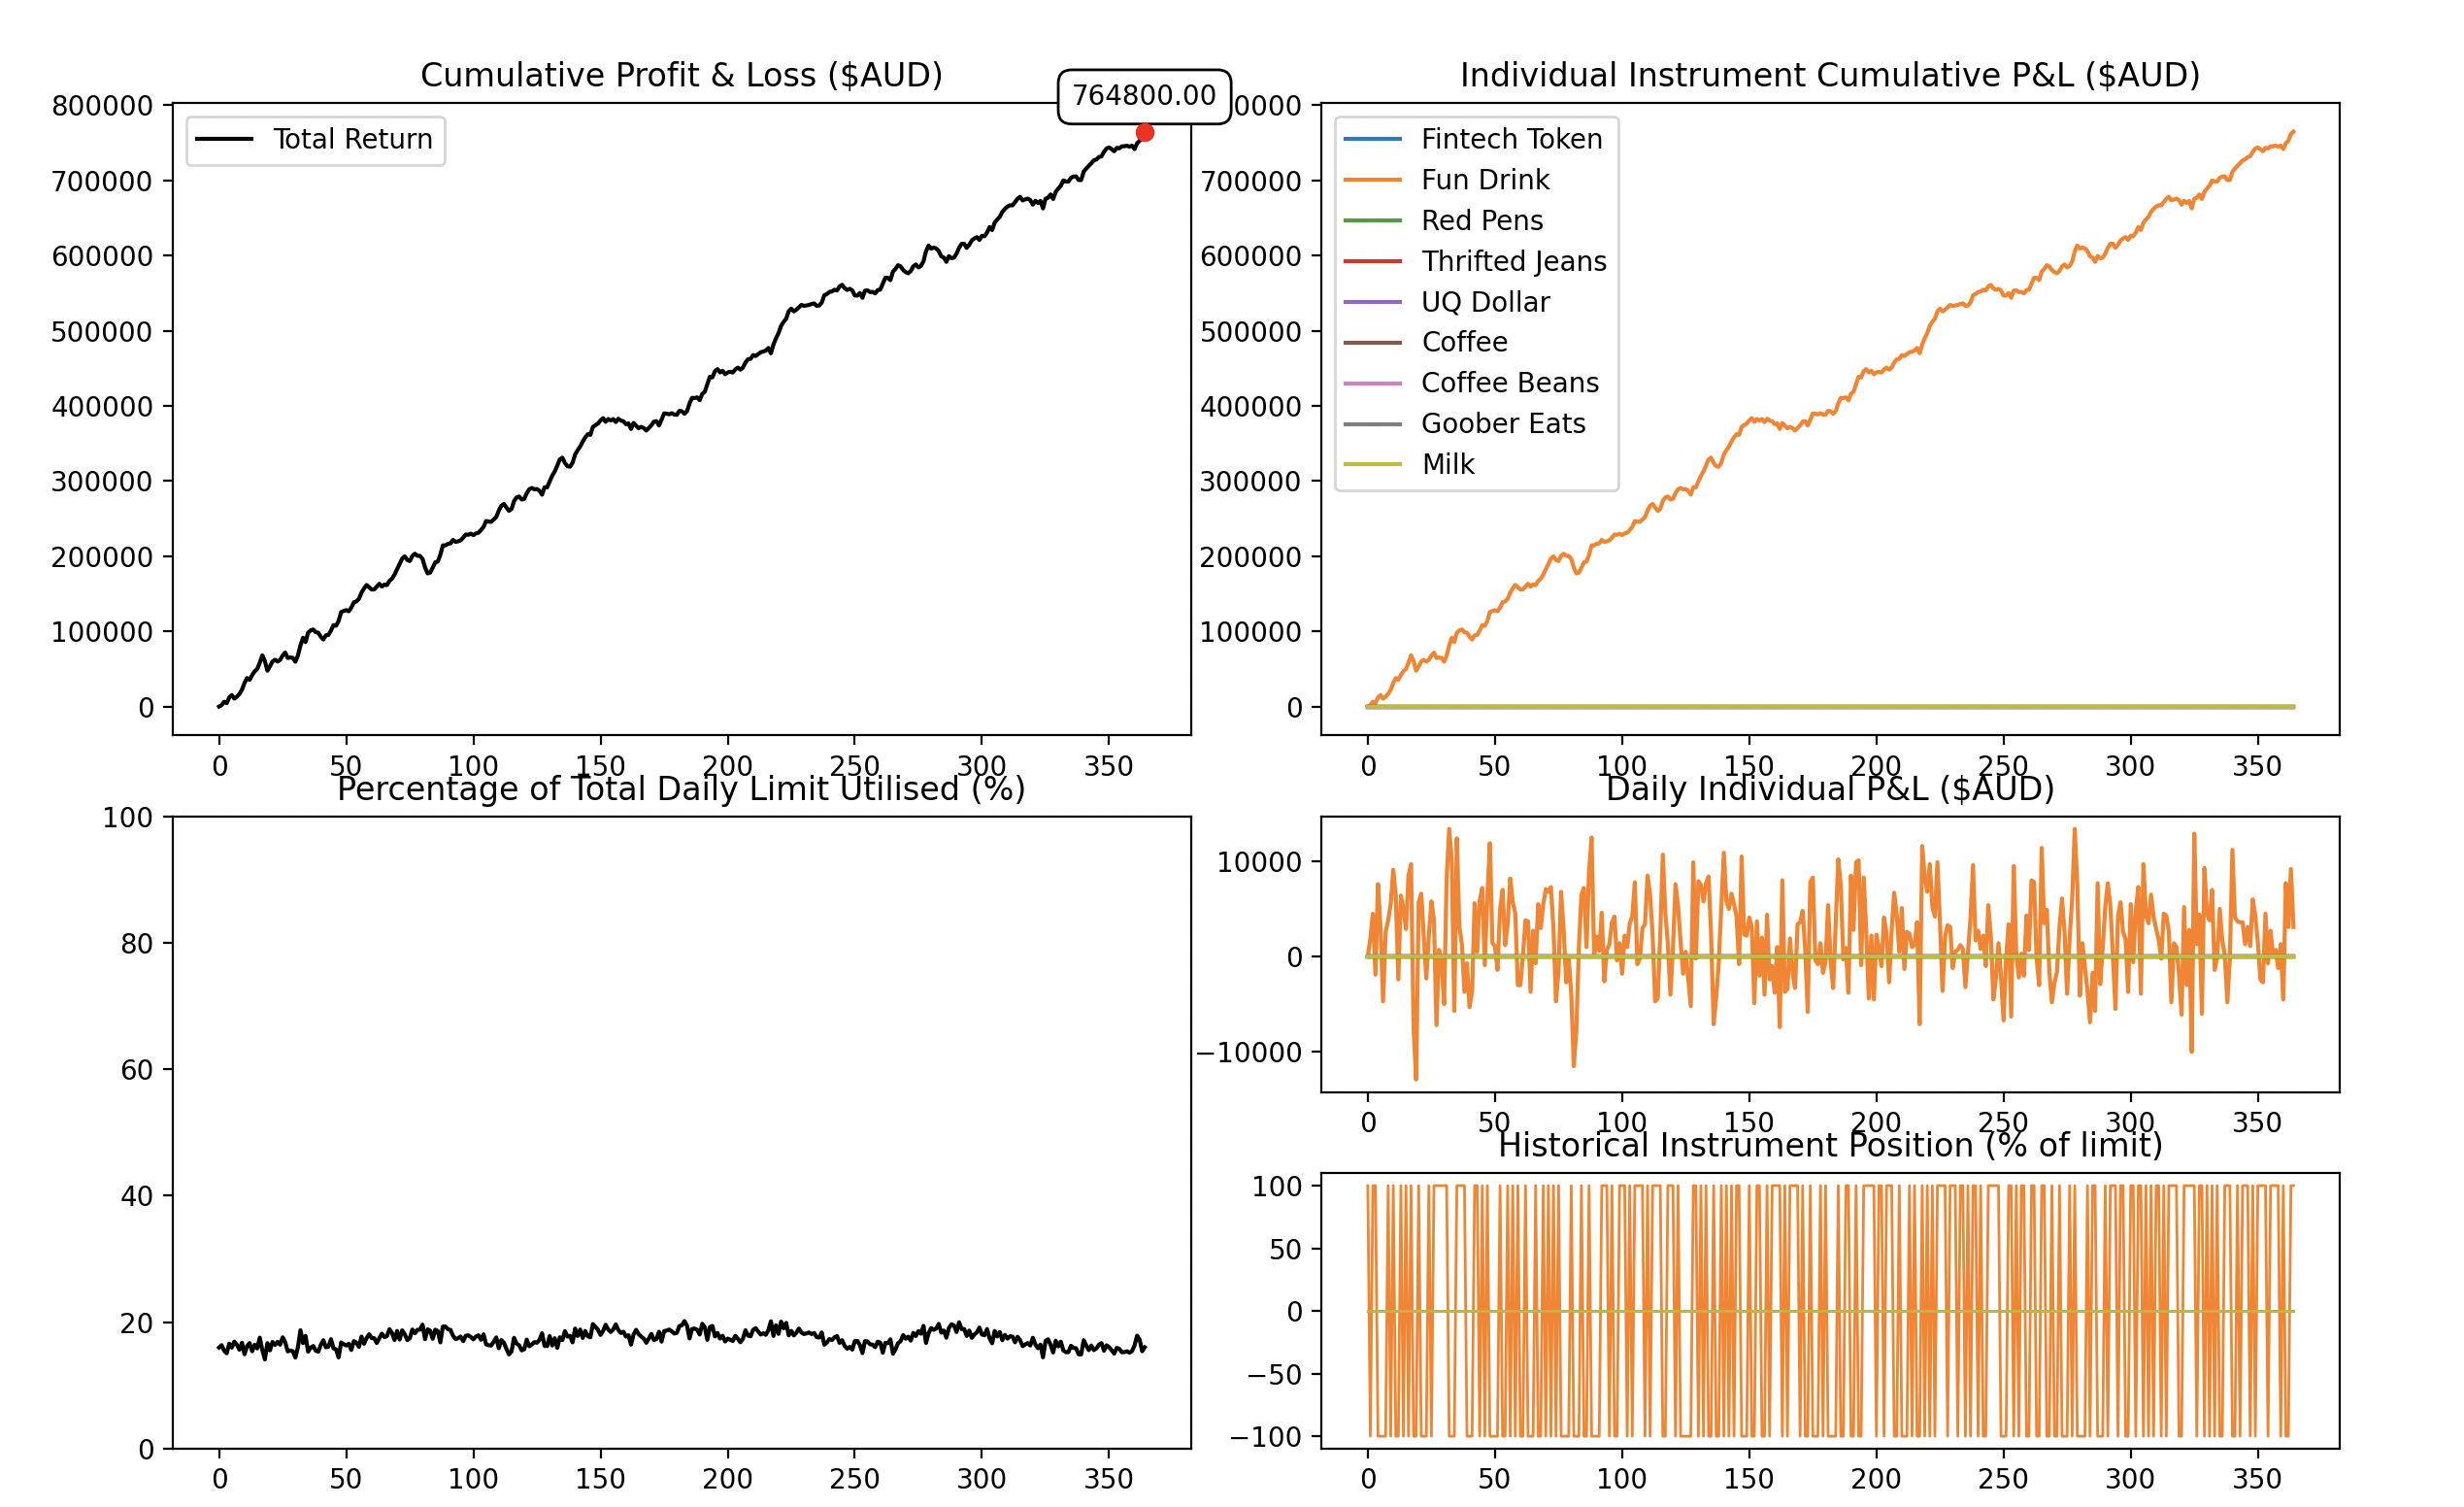

In [171]:
drink['Diff'] = drink['Price'].diff()
drink['AbsDiff'] = drink['Diff'].abs()
drink['CumAbsDiff'] = drink['AbsDiff'].cumsum()

# create a column so that for row x, if row x+1['AbsDiff'] is positive, row x['Buy'] is 1, otherwise -1
drink['Buy'] = drink['Diff'].shift(-1)
drink['Buy'] = drink['Buy'].apply(lambda x: 1 if x > 0 else -1)
drink['Buy'] = drink['Buy'].fillna(0)

drink['StockPosition'] = 10e3*drink['Buy']
drink['Transaction'] = drink['StockPosition'].diff()
drink['Transaction'] = drink['Transaction'].fillna(0 + drink['StockPosition'])

drink['CashFlow'] = -drink['Transaction'] * drink['Price']
drink['CashPos'] = drink['CashFlow'].cumsum()

drink['Theoretical Max PnL'] = drink['StockPosition'] * drink['Price'] + drink['CashPos']
# drink['PnL'] = drink['StockPosition'] * drink['Price'] 

drink

Day  Price     EMA10      EMA5     EMA15     EMA20     LR   WeekAve  \
0      0   8.00  8.000000  8.000000  8.000000  8.000000    NaN       NaN   
1      1   8.19  8.034545  8.063333  8.023750  8.018095    NaN       NaN   
2      2   7.74  7.980992  7.955556  7.988281  7.991610    NaN       NaN   
3      3   7.55  7.902630  7.820370  7.933496  7.949552    NaN       NaN   
4      4   8.31  7.976697  7.983580  7.980559  7.983880  7.952       NaN   
..   ...    ...       ...       ...       ...       ...    ...       ...   
360  360   8.17  7.831273  7.854513  7.851340  7.880144  8.087  7.765714   
361  361   8.94  8.032860  8.216342  7.987423  7.981083  8.938  7.914286   
362  362   8.63  8.141431  8.354228  8.067745  8.042885  9.200  8.057143   
363  363   7.71  8.062989  8.139485  8.023027  8.011181  8.366  8.067143   
364  364   8.02  8.055173  8.099657  8.022648  8.012021  7.835  8.111429   

      WeekVar  DayOfWeek  Diff  AbsDiff  CumAbsDiff  Buy  StockPosition  \
0         NaN          0   NaN      NaN         NaN    1        10000.0   
1         NaN          1  0.19     0.19        0.19   -1       -10000.0   
2         NaN          2 -0.45     0.45        0.64   -1       -10000.0   
3         NaN          3 -0.19     0.19        0.83    1        10000.0   
4         NaN          4  0.76     0.76        1.59   -1       -10000.0   
..        ...        ...   ...      ...         ...  ...            ...   
360  0.404286          3  0.45     0.45      147.97    1        10000.0   
361  1.025714          4  0.77     0.77      148.74   -1       -10000.0   
362  0.572857          5 -0.31     0.31      149.05   -1       -10000.0   
363 -0.357143          6 -0.92     0.92      149.97    1        10000.0   
364 -0.091429          0  0.31     0.31      150.28   -1       -10000.0   

     Transaction  CashFlow    CashPos  Theoretical Max PnL  
0        10000.0  -80000.0   -80000.0                  0.0  
1       -20000.0  163800.0    83800.0               1900.0  
2            0.0      -0.0    83800.0               6400.0  
3        20000.0 -151000.0   -67200.0               8300.0  
4       -20000.0  166200.0    99000.0              15900.0  
..           ...       ...        ...                  ...  
360          0.0      -0.0  1398000.0            1479700.0  
361     -20000.0  178800.0  1576800.0            1487400.0  
362          0.0      -0.0  1576800.0            1490500.0  
363      20000.0 -154200.0  1422600.0            1499700.0  
364     -20000.0  160400.0  1583000.0            1502800.0  

[365 rows x 19 columns]

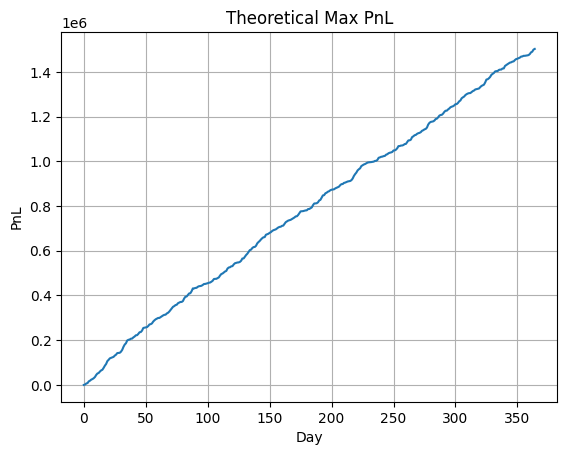

In [173]:
plt.plot(drink['Day'], drink['Theoretical Max PnL'])
plt.xlabel('Day')
plt.ylabel('PnL')
plt.title('Theoretical Max PnL')
plt.grid()




The above is the theoretical maximum Profit